## FORMA 1 - GRADIENT DESCENT

El **descenso de gradiente** es un algoritmo de optimización que se utiliza para ajustar los parámetros de un modelo de regresión lineal. El objetivo es encontrar los valores de los parámetros que minimizan la función de costo, que mide la diferencia entre las predicciones del modelo y los valores reales.

El descenso de gradiente funciona iterativamente, actualizando los valores de los parámetros en cada iteración para reducir la función de costo. En cada iteración, se calcula el gradiente de la función de costo con respecto a los parámetros y se actualizan los parámetros en la dirección opuesta al gradiente. La tasa de aprendizaje controla el tamaño de los pasos que se dan en cada iteración.

Para aplicar el descenso de gradiente a un modelo de regresión lineal, se utiliza el **MSE** como función de costo. El MSE mide la diferencia entre las predicciones del modelo y los valores reales al cuadrado. El objetivo es minimizar el MSE ajustando los valores de los parámetros.

Paso a paso del algoritmo de descenso de gradiente para optimizar un modelo de regresión lineal:

1. Inicializa los parámetros del modelo con valores aleatorios.
2. Calcula la función de costo utilizando los valores actuales de los parámetros. el error es la suma al cuadrado de todas las distancias entre la recta y los puntos.
3. Calcula el gradiente de la función de costo con respecto a los parámetros.
4. Actualiza los parámetros en la dirección opuesta al gradiente multiplicado por la tasa de aprendizaje. m = m +dm*lr
5. Repite los pasos 2-4 hasta que la función de costo converja a un mínimo o decidas parar. presentamos resultados en un gif o similar, mostrando la evolución del a curva hasta llegar al punto óptimo

COMO LO TENEIS QUE HACER VOSOTROS:

1. Inicializa los parametros `m` y `c` a cero o con valores aleatorios.
2. Elegimos un numero de iteraciones (eg. 100) y un ``learning_rate`` (eg. 0.01)
3. Inicializamos valores para X e Y. X que sean numpy arrays de 10 o 20 numeros (eg. range(10)) y la Y pueden ser parecida a la X pero con numeros arriba o abajo para simular aletoriedad (eg. 2,2,4,2,5,7,6,9,8,10)
4. Arrancamos el bucle for.
5. Calculamos la derivada del error respecto de `m` y `c`:
    - `dm = 2/n*sum((y-(m*x+c))*(-x))`
    - `dc = 2/n*sum((y-(m*x+c))*(-1))`
6. Actualizamos los parametros: `m=m-dm*lr` y `c=c-dc*lr`
7. Cada iteracion haceis un plot de la linea `x` y `m*x+c` respecto a los puntos originales (plot de x e y) y os guardais el las imagenes (Si haceis 100 iteraciones, tendreis 100 imagenes. Podeis valorar solo guardar por ejemplo cada 5 iteraciones por no hacer tantos plots).
8. Una vez terminamos printeamos m y c y con los plots generados teneis quer buscar alguna libreria en python y montar un gif con las imagenes de los plots:

![gif](https://th.bing.com/th/id/R.79e22f97090c346d704a68f7151e8cda?rik=oJV36GZyA1otdA&riu=http%3a%2f%2fcdn-images-1.medium.com%2fmax%2f640%2f1*eeIvlwkMNG1wSmj3FR6M2g.gif&ehk=0NUalJOl26VxY8ndNrkpV7GwYM1NVtJ5kMxU6jm5jB0%3d&risl=&pid=ImgRaw&r=0)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [59]:
np.random.seed(42)
X = []
for i in range(0,50):
    x1 = i + np.random.randint(0,10)
    X.append(x1)
X = np.array(X)
X

array([ 6,  4,  9,  7, 10, 14,  8, 13, 15, 13, 13, 18, 19, 15, 19, 19, 17,
       24, 23, 20, 24, 21, 31, 28, 32, 25, 35, 29, 34, 32, 38, 33, 36, 35,
       40, 39, 44, 43, 39, 42, 48, 42, 51, 51, 53, 49, 47, 50, 54, 56])

In [60]:
np.random.seed(24)
Y = []
for i in range(0,50):
    y1 = i + np.random.randint(0,10)
    Y.append(y1)
Y = np.array(Y)
Y

array([ 2,  4,  2, 10,  5,  6,  7, 11, 12, 12, 12, 14, 15, 20, 23, 17, 23,
       24, 27, 22, 20, 22, 23, 30, 30, 26, 27, 33, 29, 35, 39, 34, 32, 34,
       35, 38, 40, 38, 47, 47, 47, 46, 45, 51, 53, 45, 51, 49, 52, 55])

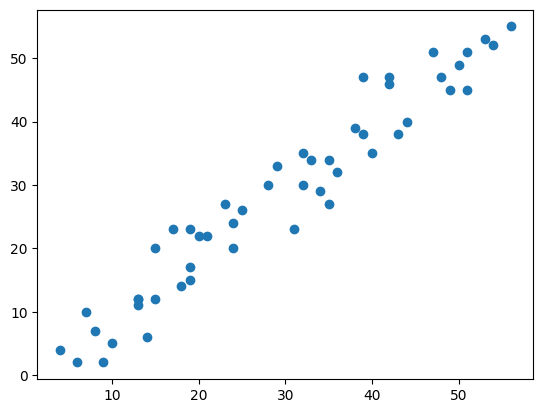

In [61]:
plt.scatter(x = X, y = Y)


In [233]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import imageio


m = 0
c = 0
lr = 0.00092 # hacemos aproximación por arriba
frames = []

for n in range(601):
    clear_output(wait=True)
    dm = (2/len(Y))*np.sum((Y-(m*X+c))*(-X))
    dc = (2/len(Y))*np.sum((Y-(m*X+c))*(-1))
    m = m - dm*lr
    c = c - dc*lr
    if n%10==0:
        fig = plt.figure()
        plt.scatter(x=X, y=Y)
        plt.plot(X, m*X+c, "r")
        plt.title(f"iter: {n}, error: {round(np.sum((Y - (m*X + c))**2)/len(Y), 3)}, m: {round(m, 3)}, c: {round(c, 3)}")

        filename = f"captura_{n}.png"
        plt.savefig(filename)
        plt.close()
        frames.append(imageio.imread(filename))

error = sum((Y - (m*X + c))**2)/len(Y)

imageio.mimsave('Animación.gif', frames, duration=0.3)

C:\Users\Victor\AppData\Local\Temp\ipykernel_1404\2864878865.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


In [211]:
""" obtenemos los mismos valores que en la fase 2, pero hacen falta 100000 iteraciones"""

from IPython.display import clear_output
m = 0
c = 0
lr = 0.00092
# y = m*x+c

for n in range(100001):
    clear_output(wait=True)  
    dm = (2/len(Y))*sum((Y-(m*X+c))*(-X))
    dc = (2/len(Y))*sum((Y-(m*X+c))*(-1))
    m=m-dm*lr
    c=c-dc*lr
    # if n%100==0:
    #     fig =plt.figure()
    #     plt.scatter(x = X, y = Y)
    #     plt.plot(X, m*X+c,"r")
    #     plt.title(f"iter: {n}, error:{round(sum((Y - (m*X + c))**2)/len(Y),3)},m: {round(m,3)}, c: {round(c,3)}" )
    #     plt.show()
error = sum((Y - (m*X + c))**2)/len(Y)
error


14.789397568052491

In [212]:
error

14.789397568052491

In [213]:
m

1.0044106128752048

In [214]:
c

-1.0494073817584504

In [215]:
# plt.scatter(x = X, y = Y)
# plt.plot(X,m*X+c,"r")


# FASE 2

In [216]:
X_1 = np.c_[np.ones((50, 1)), X]
X_1


array([[ 1.,  6.],
       [ 1.,  4.],
       [ 1.,  9.],
       [ 1.,  7.],
       [ 1., 10.],
       [ 1., 14.],
       [ 1.,  8.],
       [ 1., 13.],
       [ 1., 15.],
       [ 1., 13.],
       [ 1., 13.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 15.],
       [ 1., 19.],
       [ 1., 19.],
       [ 1., 17.],
       [ 1., 24.],
       [ 1., 23.],
       [ 1., 20.],
       [ 1., 24.],
       [ 1., 21.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 32.],
       [ 1., 25.],
       [ 1., 35.],
       [ 1., 29.],
       [ 1., 34.],
       [ 1., 32.],
       [ 1., 38.],
       [ 1., 33.],
       [ 1., 36.],
       [ 1., 35.],
       [ 1., 40.],
       [ 1., 39.],
       [ 1., 44.],
       [ 1., 43.],
       [ 1., 39.],
       [ 1., 42.],
       [ 1., 48.],
       [ 1., 42.],
       [ 1., 51.],
       [ 1., 51.],
       [ 1., 53.],
       [ 1., 49.],
       [ 1., 47.],
       [ 1., 50.],
       [ 1., 54.],
       [ 1., 56.]])

In [217]:
best_W = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(Y)
best_W

array([-1.04940738,  1.00441061])

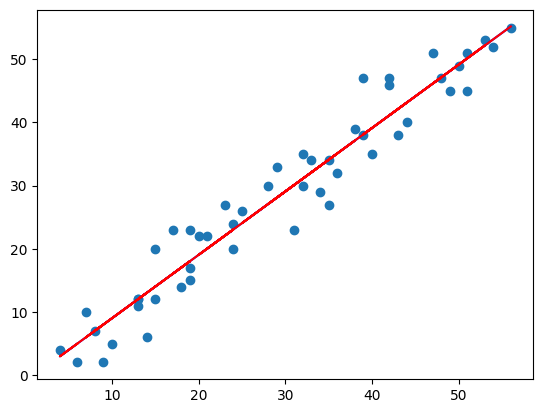

In [218]:
plt.scatter(x = X, y = Y)
plt.plot(X,best_W[1]*X+best_W[0],"b")
plt.plot(X,m*X+c,"r")


# FASE 3

In [219]:
df = pd.DataFrame({"X":X,
                   "Y":Y})
df

,X,Y
0,6,2
1,4,4
2,9,2
3,7,10
4,10,5
5,14,6
6,8,7
7,13,11
8,15,12
9,13,12


In [220]:
Xdf = df[["X"]]
Xdf.shape

(50, 1)

In [221]:
y = df["Y"]
y.shape

(50,)

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(Xdf,y,test_size=0.2,random_state=42)

In [223]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(40, 1)
(10, 1)
(40,)
(10,)


In [224]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [225]:
coef = lr.coef_
coef[0]

1.0245415281206158

In [226]:
lr.intercept_

-1.7426846312043835

In [227]:
y_pred = lr.predict(X_test)
y_pred

array([13.62543829, 41.28805955, 37.18989344, 48.45985025, 22.84631204,
       53.58255789, 34.11626885, 23.87085357, 35.14081038, 18.74814593])

In [228]:
X_test

,X
13,15
39,42
30,38
45,49
17,24
48,54
26,35
25,25
32,36
19,20


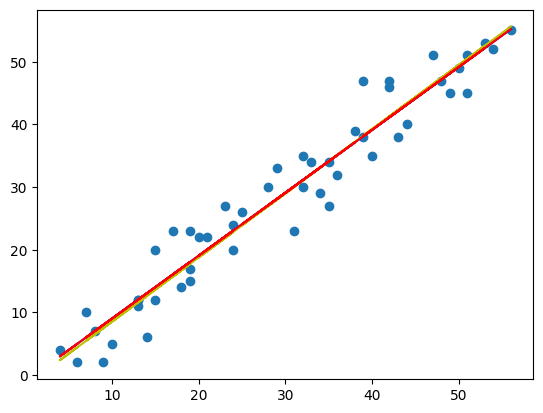

In [229]:
plt.scatter(x = X, y = Y)
plt.plot(X,best_W[1]*X+best_W[0],"b")
plt.plot(X,coef[0]*X+lr.intercept_,"y")
plt.plot(X,m*X+c,"r")

In [230]:
print(f"Fase 1: m: {round(m,6)},c: {round(c,6)}, Fase 2: m: {round(best_W[1],6)} c: {round(best_W[0],6)}, Fase 3: m: {round(coef[0],6)},c: {round(lr.intercept_,6)}")

Fase 1: m: 1.004411,c: -1.049407, Fase 2: m: 1.004411 c: -1.049407, Fase 3: m: 1.024542,c: -1.742685
